## Initial Setup - Import libraries and input data

In [1]:
%matplotlib inline

import numpy as np 
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

from statsmodels.tsa.stattools import adfuller 
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.vector_ar.vecm import coint_johansen #Johansen Cointegration test

## Reading data

In [2]:
store = pd.read_csv('store.csv')
data = pd.read_csv('train.csv')
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Filtering data for the selected stores only

In [3]:
data = data[(data['Store'] == 1)|(data['Store'] == 3)|(data['Store'] == 8)|(data['Store'] == 9)|(data['Store'] == 13)|
            (data['Store'] == 25)|(data['Store'] == 29)|(data['Store'] == 31)|(data['Store'] == 46)]

In [4]:
len(data)

8110

In [5]:
# exogenous factor: OpenStatus

In [6]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

Calcuating total number of days in the data

In [7]:
count = 0
for x in set(data['Date']):
    count+=1
print(count)

942


Merging train.csv with store information

In [8]:
data_merged = data.merge(store, on='Store', how='inner')
data_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


## Separating data for individual store

In [9]:
data_store1 = data_merged[data_merged['Store'] == 1]
data_store1 = data_store1.drop(columns = ['Store', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
                                          'CompetitionDistance', 'CompetitionOpenSinceMonth',
                                          'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
                                          'Promo2SinceYear', 'PromoInterval'])
data_store1 = data_store1.set_index('Date')
data_store1 = data_store1.sort_index()
data_store1.head()

,DayOfWeek,Sales,Customers,Open,Promo
Date,,,,,
2013-01-01,2,0,0,0,0
2013-01-02,3,5530,668,1,0
2013-01-03,4,4327,578,1,0
2013-01-04,5,4486,619,1,0
2013-01-05,6,4997,635,1,0


In [10]:
data_store8 = data_merged[data_merged['Store'] == 8]
data_store8 = data_store8.drop(columns = ['Store', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])
data_store8 = data_store8.set_index('Date')
data_store8 = data_store8.sort_index()
data_store8.head()

,DayOfWeek,Sales,Customers,Open,Promo
Date,,,,,
2013-01-01,2,0,0,0,0
2013-01-02,3,5419,698,1,0
2013-01-03,4,4842,662,1,0
2013-01-04,5,4059,517,1,0
2013-01-05,6,2337,312,1,0


In [11]:
data_store9 = data_merged[data_merged['Store'] == 9]
data_store9 = data_store9.drop(columns = ['Store', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])
data_store9 = data_store9.set_index('Date')
data_store9 = data_store9.sort_index()
data_store9.head()

,DayOfWeek,Sales,Customers,Open,Promo
Date,,,,,
2013-01-01,2,0,0,0,0
2013-01-02,3,4903,481,1,0
2013-01-03,4,4602,453,1,0
2013-01-04,5,4798,497,1,0
2013-01-05,6,4254,450,1,0


In [12]:
data_store25 = data_merged[data_merged['Store'] == 25]
data_store25 = data_store25.drop(columns = ['Store', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])
data_store25 = data_store25.set_index('Date')
data_store25 = data_store25.sort_index()
data_store25.head()

,DayOfWeek,Sales,Customers,Open,Promo
Date,,,,,
2013-01-01,2,0,0,0,0
2013-01-02,3,11944,1698,1,0
2013-01-03,4,10409,1587,1,0
2013-01-04,5,9729,1520,1,0
2013-01-05,6,8987,1381,1,0


In [13]:
data_store29 = data_merged[data_merged['Store'] == 29]
data_store29 = data_store29.drop(columns = ['Store', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])
data_store29 = data_store29.set_index('Date')
data_store29 = data_store29.sort_index()
data_store29.head()

,DayOfWeek,Sales,Customers,Open,Promo
Date,,,,,
2013-01-01,2,0,0,0,0
2013-01-02,3,5269,550,1,0
2013-01-03,4,4554,456,1,0
2013-01-04,5,5411,505,1,0
2013-01-05,6,5564,537,1,0


In [14]:
data_store31 = data_merged[data_merged['Store'] == 31]
data_store31 = data_store31.drop(columns = ['Store', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])
data_store31 = data_store31.set_index('Date')
data_store31 = data_store31.sort_index()
data_store31.head()

,DayOfWeek,Sales,Customers,Open,Promo
Date,,,,,
2013-01-01,2,0,0,0,0
2013-01-02,3,5122,567,1,0
2013-01-03,4,5623,578,1,0
2013-01-04,5,6140,633,1,0
2013-01-05,6,5607,624,1,0


In [15]:
data_store3 = data_merged[data_merged['Store'] == 3]
data_store3 = data_store3.drop(columns = ['Store', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])
data_store3 = data_store3.reset_index()
for x in range(len(data_store3)):
    if(data_store3['Date'][x].month in [1,4,7,10]):
        data_store3['Promo2'][x] = 1
    else:
        data_store3['Promo2'][x] = 0 
data_store3 = data_store3.set_index('Date')
data_store3 = data_store3.sort_index()
data_store3.head()

,index,DayOfWeek,Sales,Customers,Open,Promo,Promo2
Date,,,,,,,
2013-01-01,1883,2,0,0,0,0,1
2013-01-02,1882,3,6823,805,1,0,1
2013-01-03,1881,4,5902,721,1,0,1
2013-01-04,1880,5,6069,690,1,0,1
2013-01-05,1879,6,4523,525,1,0,1


In [16]:
data_store13 = data_merged[data_merged['Store'] == 13]
data_store13 = data_store13.drop(columns = ['Store', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])
data_store13 = data_store13.reset_index()
for x in range(len(data_store13)):
    if(data_store13['Date'][x].month in [2,5,8,11]):
        data_store13['Promo2'][x] = 1
    else:
        data_store13['Promo2'][x] = 0
data_store13 = data_store13.set_index('Date')
data_store13 = data_store13.sort_index()
data_store13.head()

,index,DayOfWeek,Sales,Customers,Open,Promo,Promo2
Date,,,,,,,
2013-01-01,4525,2,0,0,0,0,0
2013-01-02,4524,3,3737,317,1,0,0
2013-01-03,4523,4,3674,292,1,0,0
2013-01-04,4522,5,3848,340,1,0,0
2013-01-05,4521,6,4285,344,1,0,0


In [17]:
data_store46 = data_merged[data_merged['Store'] == 46]
data_store46 = data_store46.drop(columns = ['Store', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'])
data_store46 = data_store46.reset_index()
for x in range(len(data_store46)):
    if(data_store46['Date'][x].month in [1,4,7,10]):
        data_store46['Promo2'][x] = 1
    else:
        data_store46['Promo2'][x] = 0
data_store46 = data_store46.set_index('Date')
data_store46 = data_store46.sort_index()
data_store46.head()

,index,DayOfWeek,Sales,Customers,Open,Promo,Promo2
Date,,,,,,,
2013-01-01,8109,2,0,0,0,0,1
2013-01-02,8108,3,4016,582,1,0,1
2013-01-03,8107,4,4177,553,1,0,1
2013-01-04,8106,5,4125,569,1,0,1
2013-01-05,8105,6,4848,651,1,0,1


# Analyze data_store1 data and build a model

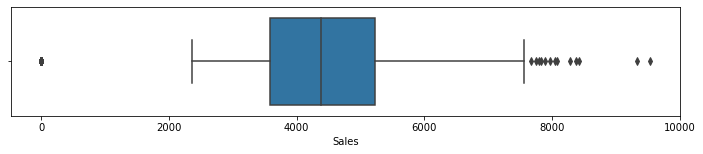

In [18]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data_store1['Sales'],whis=1.5)

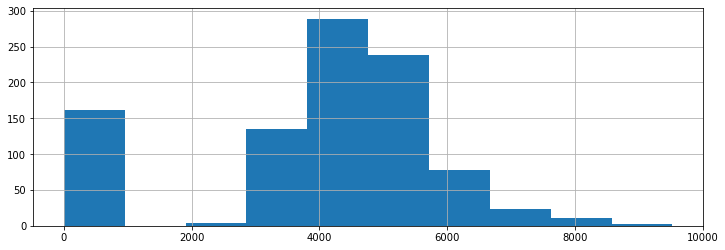

In [19]:
fig = data_store1.Sales.hist(figsize = (12,4))

In [20]:
data_store1["Sales"] = np.where(data_store1["Sales"] <=2000.0, 2000.0,data_store1['Sales'])
data_store1["Sales"] = np.where(data_store1["Sales"] >8000.0, 8000.0,data_store1['Sales'])

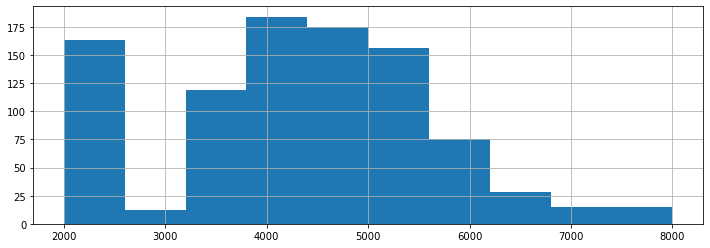

In [21]:
fig = data_store1.Sales.hist(figsize = (12,4))

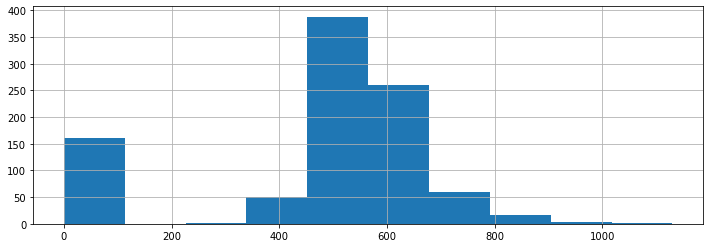

In [22]:
fig = data_store1.Customers.hist(figsize = (12,4))

In [23]:
data_store1["Customers"] = np.where(data_store1["Customers"] <=200.0, 200.0,data_store1['Customers'])
data_store1["Customers"] = np.where(data_store1["Customers"] >800.0, 800.0,data_store1['Customers'])

In [27]:
data_store1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25',
               '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)

In [28]:
train = data_store1[:706]
test = data_store1[706:]

In [29]:
train.head()

,DayOfWeek,Sales,Customers,Open,Promo
Date,,,,,
2013-01-01,2,2000.0,0,0,0
2013-01-02,3,5530.0,668,1,0
2013-01-03,4,4327.0,578,1,0
2013-01-04,5,4486.0,619,1,0
2013-01-05,6,4997.0,635,1,0


In [30]:
test.head()

,DayOfWeek,Sales,Customers,Open,Promo
Date,,,,,
2014-12-08,1,4884.0,610,1,0
2014-12-09,2,4345.0,559,1,0
2014-12-10,3,4915.0,619,1,0
2014-12-11,4,5060.0,587,1,0
2014-12-12,5,5269.0,617,1,0


In [31]:
temp = train.drop(columns = ['DayOfWeek', 'Sales', 'Open', 'Promo'])

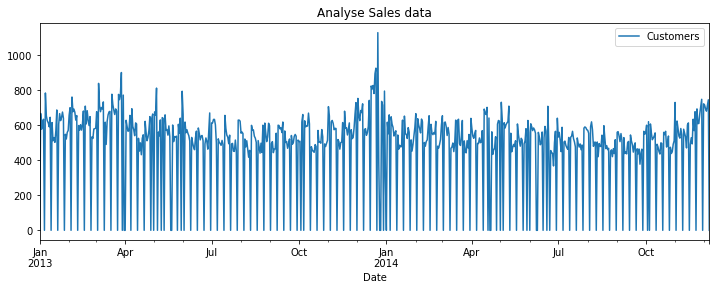

In [32]:
temp.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Analyse Sales data')
plt.show(block=False)

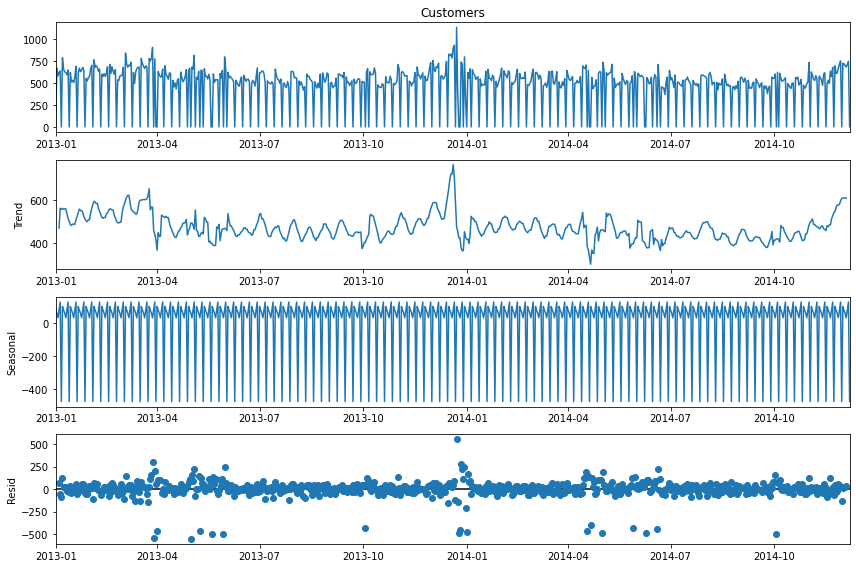

In [33]:
from pylab import rcParams
import statsmodels.api as sm

fig , (axis1 , axis2) = 
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(temp.Customers, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

In [34]:
train['lnSales'] = np.log(train['Sales'])
train['lnCustomers'] = np.log(train['Customers'])
train['dlnSales'] = np.log(train['Sales']).diff()
train['dlnCustomers'] = np.log(train['Customers']).diff()
test['lnSales'] = np.log(test['Sales'])
test['lnCustomers'] = np.log(test['Customers'])
test['dlnSales'] = np.log(test['Sales']).diff()
test['dlnCustomers'] = np.log(test['Customers']).diff()

In [35]:
train.head()

,DayOfWeek,Sales,Customers,Open,Promo,lnSales,lnCustomers,dlnSales,dlnCustomers
Date,,,,,,,,,
2013-01-01,2,2000.0,0,0,0,7.600902,-inf,NaN,NaN
2013-01-02,3,5530.0,668,1,0,8.617943,6.504288,1.017041,inf
2013-01-03,4,4327.0,578,1,0,8.372630,6.359574,-0.245313,-0.144714
2013-01-04,5,4486.0,619,1,0,8.408717,6.428105,0.036087,0.068531
2013-01-05,6,4997.0,635,1,0,8.516593,6.453625,0.107876,0.025520


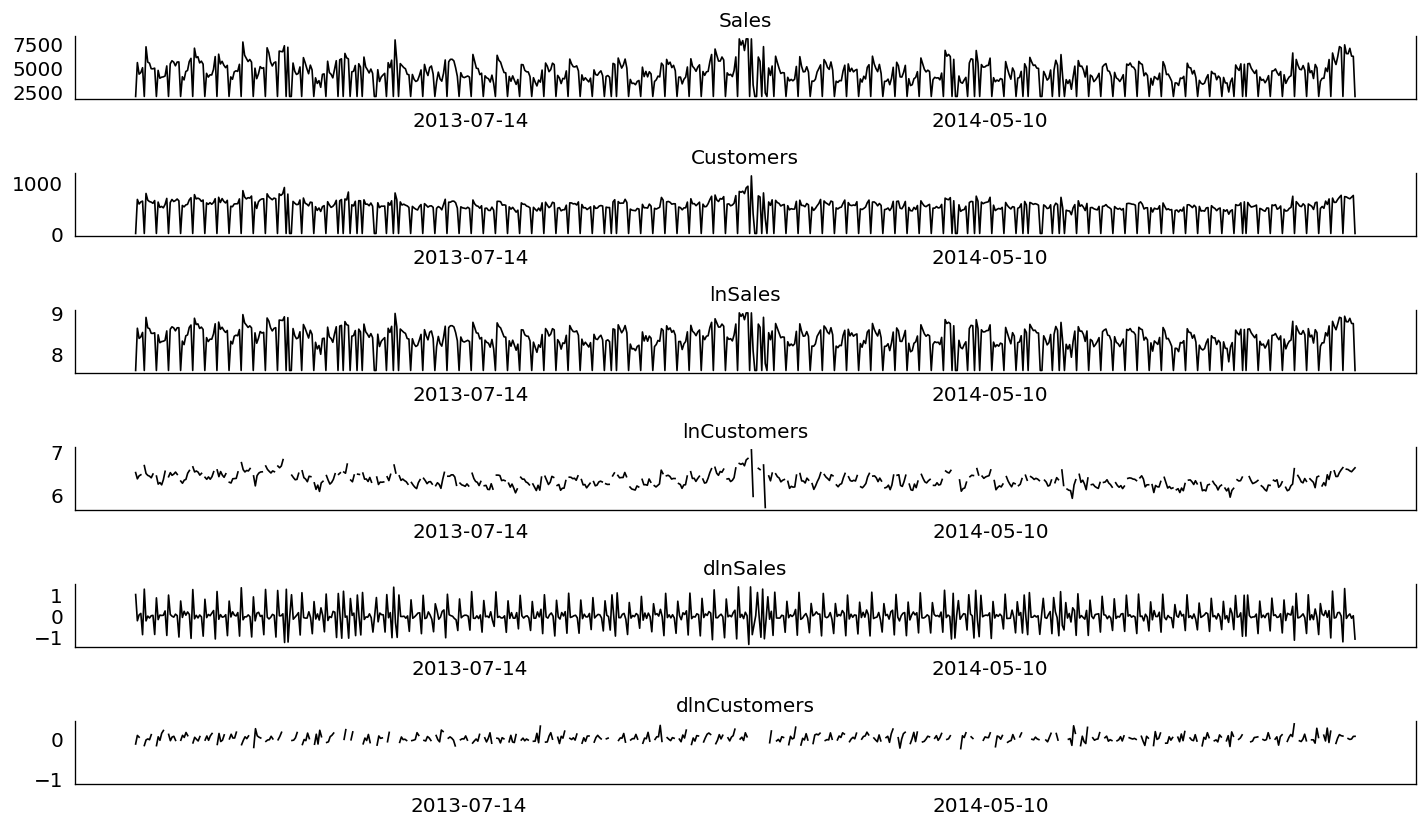

In [36]:
# Plot
ls=['Sales','Customers','lnSales','lnCustomers', 'dlnSales', 'dlnCustomers']
df=train[ls]
fig, axes = plt.subplots(nrows=6, ncols=1, dpi=120, figsize=(12,7))
for i, ax in enumerate(axes.flatten()):
        ax.plot(df[df.columns[i]], color='black', linewidth=1)
        ax.xaxis.set_major_locator(plt.MaxNLocator(3))
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=12)

plt.tight_layout();

In [37]:
for i in range(len(ls)):
    print('\n\n' + ls[i] + ': ADF test results:')
    result = adfuller(train[ls[i]].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        if key=='5%':
            print('\t%s: %.3f' % (key, value))



Sales: ADF test results:
ADF Statistic: -2.990628
p-value: 0.035779
Critical Values:
	5%: -2.866


Customers: ADF test results:
ADF Statistic: -2.478474
p-value: 0.120800
Critical Values:
	5%: -2.866


lnSales: ADF test results:
ADF Statistic: -2.990713
p-value: 0.035771
Critical Values:
	5%: -2.866


lnCustomers: ADF test results:


MissingDataError: exog contains inf or nans

## VAR Model

In [38]:
# exog = train['Open']
mod = sm.tsa.VARMAX(train[['dlnSales', 'dlnCustomers']], order=(1,0), trend='c')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())
#Note the AIC value - lower AIC => better model

LinAlgError: SVD did not converge in Linear Least Squares

In [35]:
# exog = train['Open']
mod = sm.tsa.VARMAX(train[['dlnSales', 'dlnCustomers']], order=(1,1), trend='c')
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())
#Note the AIC value - lower AIC => better model

                                Statespace Model Results                                
Dep. Variable:     ['dlnSales', 'dlnCustomers']   No. Observations:                  706
Model:                               VARMA(1,1)   Log Likelihood                 504.016
                                    + intercept   AIC                           -982.032
Date:                          Mon, 12 Apr 2021   BIC                           -922.757
Time:                                  22:38:07   HQIC                          -959.128
Sample:                              01-01-2013                                         
                                   - 12-07-2014                                         
Covariance Type:                            opg                                         
Ljung-Box (L1) (Q):               nan, nan   Jarque-Bera (JB):        142.04, 11.06
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):        

In [1]:
start_index = test.index.min()
end_index = test.index.max()
predictions = mod.fit().predict(start=start_index, end=end_index)


for i in range(predictions.shape[0]):
    if i==0:
        predictions.loc[predictions.index=='2014-12-08','lag_ln_Sales']=train.iloc[705,5]
        predictions.loc[predictions.index=='2014-12-08','lag_ln_Customers']=train.iloc[705,6]
    else:
        predictions.iloc[i,2]=predictions.iloc[i-1,4]
        predictions.iloc[i,3]=predictions.iloc[i-1,5]

    predictions['lnSales']=(predictions['lag_ln_Sales']+predictions['dlnSales'])
    predictions['lnCustomers']=(predictions['lag_ln_Customers']+predictions['dlnCustomers'])


    predictions['Sales']=np.exp(predictions['lnSales'])
    predictions['Customers']=np.exp(predictions['lnCustomers'])

NameError: name 'test' is not defined

In [37]:
predictions.head()

,dlnSales,dlnCustomers,lag_ln_Sales,lag_ln_Customers,lnSales,lnCustomers,Sales,Customers
2014-12-08,1.005458,1.143988,7.600902,5.298317,8.606360,6.442306,5466.317636,627.852651
2014-12-09,-0.239414,-0.219100,8.606360,6.442306,8.366946,6.223206,4302.478275,504.317325
2014-12-10,0.010318,-0.028235,8.366946,6.223206,8.377265,6.194971,4347.102147,490.277138
2014-12-11,0.032397,0.057598,8.377265,6.194971,8.409662,6.252568,4490.241696,519.345023
2014-12-12,-0.025921,-0.038458,8.409662,6.252568,8.383741,6.214110,4375.347711,499.751140


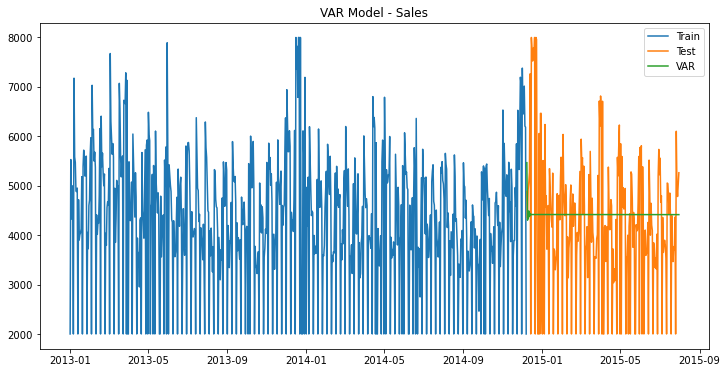

In [38]:
plt.figure(figsize=(12,6)) 
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(predictions['Sales'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

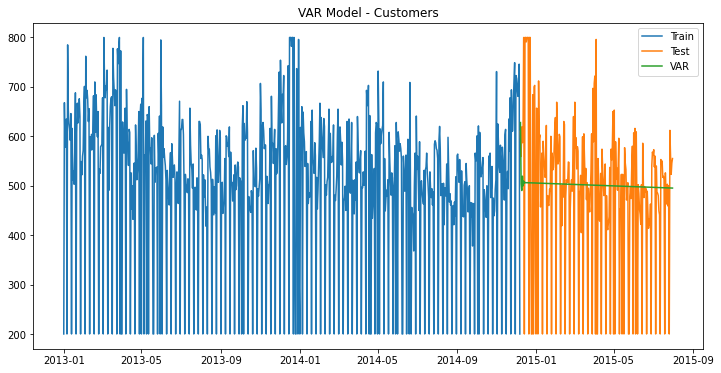

In [39]:
plt.figure(figsize=(12,6))
plt.plot(train['Customers'], label='Train')
plt.plot(test['Customers'], label='Test')
plt.plot(predictions['Customers'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Customers')
plt.show()

In [40]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.Sales, predictions.Sales)).round(2)
#print('Income: RMSE:',  rmse)

model_comparison=pd.DataFrame()
model_comparison.loc[0,'Model']='VAR'
model_comparison.loc[0,'Variable']='Sales'
model_comparison.loc[0,'RMSE']=rmse

rmse = np.sqrt(mean_squared_error(test.Customers, predictions.Customers)).round(2)
#print('Investment: RMSE:',  rmse)

append=pd.DataFrame()
append.loc[0,'Model']='VAR'
append.loc[0,'Variable']='Customers'
append.loc[0,'RMSE']=rmse

model_comparison = model_comparison.append(append)

# Mean Absolute Percentage Error
abs_error = np.abs(test.Sales-predictions.Sales)
actual = test.Sales
mape = np.round(np.mean(abs_error/actual)*100, 2)
#print('Income: MAPE:',  mape)

model_comparison.loc[model_comparison['Variable']=='Sales', 'MAPE'] = mape

abs_error = np.abs(test.Customers-predictions.Customers)
actual = test.Customers
mape = np.round(np.mean(abs_error/actual)*100, 2)
#print('Investment: MAPE:',  mape)

model_comparison.loc[model_comparison['Variable']=='Customers', 'MAPE'] = mape

In [41]:
model_comparison.reset_index(drop=True, inplace=True)
model_comparison

,Model,Variable,RMSE,MAPE
0,VAR,Sales,1427.83,35.01
1,VAR,Customers,155.69,36.50


## Cointegration - Johansen Test

In [42]:
"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
"""

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')

In [43]:
data_store1.head()

,DayOfWeek,Sales,Customers,Open,Promo
Date,,,,,
2013-01-01,2,2000.0,200.0,0,0
2013-01-02,3,5530.0,668.0,1,0
2013-01-03,4,4327.0,578.0,1,0
2013-01-04,5,4486.0,619.0,1,0
2013-01-05,6,4997.0,635.0,1,0


In [44]:
joh_model1 = coint_johansen(train[['lnCustomers','lnSales']],-1,1) # k_ar_diff +1 = K
joh_output(joh_model1)

   max_eig_stat  trace_stat
0    365.415677  365.464959
1      0.049282    0.049282 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[ 9.4748 11.2246 15.0923]
 [ 2.9762  4.1296  6.9406]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[10.4741 12.3212 16.364 ]
 [ 2.9762  4.1296  6.9406]] 



Note that the test-statistics at each stage for both trace test and max eigen test are greater than the test statistic at 5% significance level. 
SO THE RANK OF THE MATRIX IS 2 => NO COINTEGRATION => VAR IN DIFFERENCE IS SUFFICIENT FOR THESE 2 SERIES.

## VARMAX MODEL

## "Open" as Exogenous Factor

In [45]:
exog = train['Open']
mod = sm.tsa.VARMAX(train[['dlnSales', 'dlnCustomers']], order=(1,1), trend='c', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())
#Note the AIC value - lower AIC => better model 
#The VAR model has AIC = -665, while the VARMAX model has AIC = -713
#So including the MA components, and the exogenous variable, consumption, imporved our forecast

                                Statespace Model Results                                
Dep. Variable:     ['dlnSales', 'dlnCustomers']   No. Observations:                  706
Model:                              VARMAX(1,1)   Log Likelihood                 934.795
                                    + intercept   AIC                          -1839.590
Date:                          Mon, 12 Apr 2021   BIC                          -1771.196
Time:                                  22:38:28   HQIC                         -1813.162
Sample:                              01-01-2013                                         
                                   - 12-07-2014                                         
Covariance Type:                            opg                                         
Ljung-Box (L1) (Q):               nan, nan   Jarque-Bera (JB):        219.29, 36.19
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):        

In [46]:
start_index = test.index.min()
end_index = test.index.max()
predictions = mod.fit().predict(start=start_index, end=end_index, exog=test['Open'])


for i in range(predictions.shape[0]):
    if i==0:
        predictions.loc[predictions.index=='2014-12-08','lag_ln_Sales']=train.iloc[705,5]
        predictions.loc[predictions.index=='2014-12-08','lag_ln_Customers']=train.iloc[705,6]
    else:
        predictions.iloc[i,2]=predictions.iloc[i-1,4]
        predictions.iloc[i,3]=predictions.iloc[i-1,5]

    predictions['lnSales']=(predictions['lag_ln_Sales']+predictions['dlnSales'])
    predictions['lnCustomers']=(predictions['lag_ln_Customers']+predictions['dlnCustomers'])


    predictions['Sales']=np.exp(predictions['lnSales'])
    predictions['Customers']=np.exp(predictions['lnCustomers'])

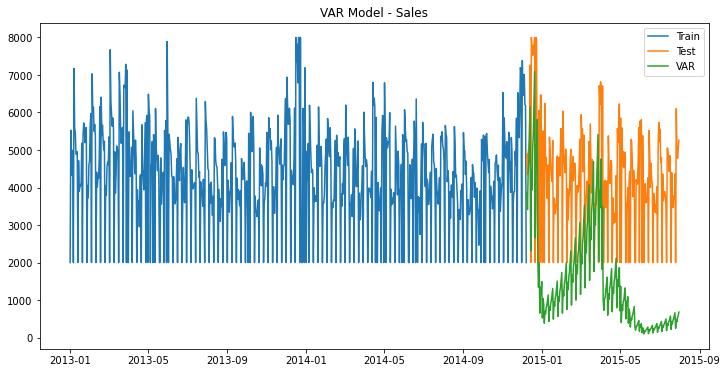

In [47]:
plt.figure(figsize=(12,6)) 
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(predictions['Sales'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

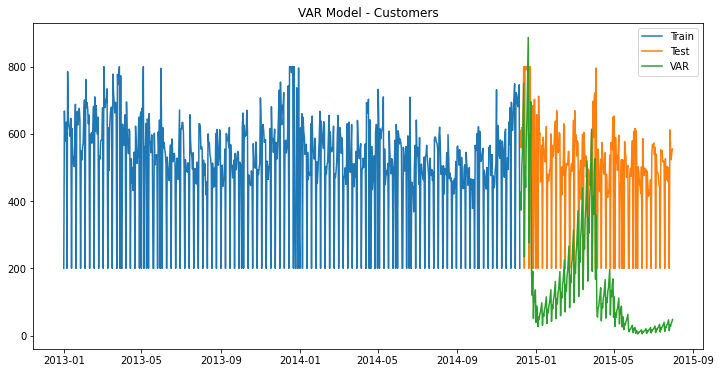

In [48]:
plt.figure(figsize=(12,6))
plt.plot(train['Customers'], label='Train')
plt.plot(test['Customers'], label='Test')
plt.plot(predictions['Customers'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Customers')
plt.show()

In [49]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.Sales, predictions.Sales)).round(2)
#print('Income: RMSE:',  rmse)

model_comparison1=pd.DataFrame()
model_comparison1.loc[0,'Model']='VARMAX'
model_comparison1.loc[0,'Variable']='Sales'
model_comparison1.loc[0,'RMSE']=rmse

rmse = np.sqrt(mean_squared_error(test.Customers, predictions.Customers)).round(2)
#print('Investment: RMSE:',  rmse)

append=pd.DataFrame()
append.loc[0,'Model']='VARMAX'
append.loc[0,'Variable']='Customers'
append.loc[0,'RMSE']=rmse

model_comparison1 = model_comparison1.append(append)

# Mean Absolute Percentage Error
abs_error = np.abs(test.Sales-predictions.Sales)
actual = test.Sales
mape = np.round(np.mean(abs_error/actual)*100, 2)
#print('Income: MAPE:',  mape)

model_comparison1.loc[model_comparison1['Variable']=='Sales', 'MAPE'] = mape

abs_error = np.abs(test.Customers-predictions.Customers)
actual = test.Customers
mape = np.round(np.mean(abs_error/actual)*100, 2)
#print('Investment: MAPE:',  mape)

model_comparison1.loc[model_comparison1['Variable']=='Customers', 'MAPE'] = mape

In [50]:
model_comparison.append(model_comparison1)

,Model,Variable,RMSE,MAPE
0,VAR,Sales,1427.83,35.01
1,VAR,Customers,155.69,36.50
0,VARMAX,Sales,3096.79,65.98
0,VARMAX,Customers,378.56,71.80


## Promo as Exogenous Factor

In [51]:
exog = train['Promo']
mod = sm.tsa.VARMAX(train[['dlnSales', 'dlnCustomers']], order=(1,1), trend='c', exog=exog)
res = mod.fit(maxiter=1000, disp=False)
print(res.summary())
#Note the AIC value - lower AIC => better model 
#The VAR model has AIC = -665, while the VARMAX model has AIC = -713
#So including the MA components, and the exogenous variable, consumption, imporved our forecast

                                Statespace Model Results                                
Dep. Variable:     ['dlnSales', 'dlnCustomers']   No. Observations:                  706
Model:                              VARMAX(1,1)   Log Likelihood                 527.415
                                    + intercept   AIC                          -1024.830
Date:                          Mon, 12 Apr 2021   BIC                           -956.435
Time:                                  22:39:27   HQIC                          -998.402
Sample:                              01-01-2013                                         
                                   - 12-07-2014                                         
Covariance Type:                            opg                                         
Ljung-Box (L1) (Q):               nan, nan   Jarque-Bera (JB):        176.35, 12.02
Prob(Q):                          nan, nan   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):        

In [52]:
start_index = test.index.min()
end_index = test.index.max()
predictions = mod.fit().predict(start=start_index, end=end_index, exog=test['Promo'])


for i in range(predictions.shape[0]):
    if i==0:
        predictions.loc[predictions.index=='2014-12-08','lag_ln_Sales']=train.iloc[705,5]
        predictions.loc[predictions.index=='2014-12-08','lag_ln_Customers']=train.iloc[705,6]
    else:
        predictions.iloc[i,2]=predictions.iloc[i-1,4]
        predictions.iloc[i,3]=predictions.iloc[i-1,5]

    predictions['lnSales']=(predictions['lag_ln_Sales']+predictions['dlnSales'])
    predictions['lnCustomers']=(predictions['lag_ln_Customers']+predictions['dlnCustomers'])


    predictions['Sales']=np.exp(predictions['lnSales'])
    predictions['Customers']=np.exp(predictions['lnCustomers'])

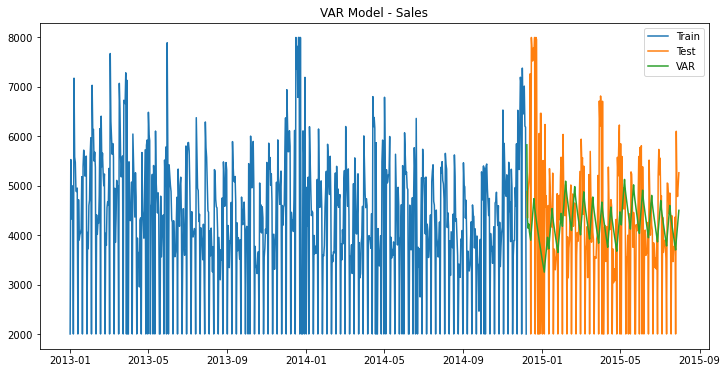

In [53]:
plt.figure(figsize=(12,6)) 
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(predictions['Sales'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Sales')
plt.show()

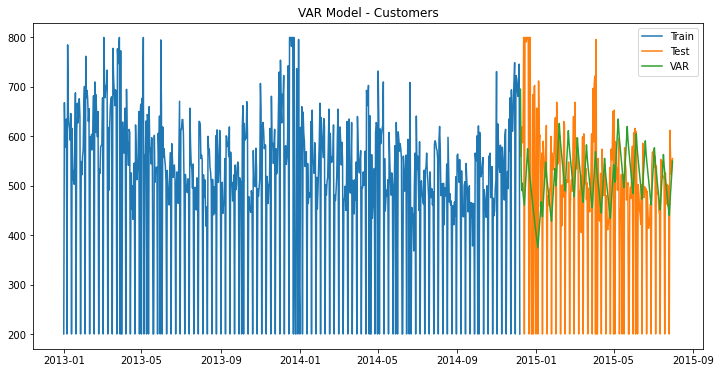

In [54]:
plt.figure(figsize=(12,6))
plt.plot(train['Customers'], label='Train')
plt.plot(test['Customers'], label='Test')
plt.plot(predictions['Customers'], label='VAR')
plt.legend(loc='best')
plt.title('VAR Model - Customers')
plt.show()

In [55]:
# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(test.Sales, predictions.Sales)).round(2)
#print('Income: RMSE:',  rmse)

model_comparison1=pd.DataFrame()
model_comparison1.loc[0,'Model']='VARMAX'
model_comparison1.loc[0,'Variable']='Sales'
model_comparison1.loc[0,'RMSE']=rmse

rmse = np.sqrt(mean_squared_error(test.Customers, predictions.Customers)).round(2)
#print('Investment: RMSE:',  rmse)

append=pd.DataFrame()
append.loc[0,'Model']='VARMAX'
append.loc[0,'Variable']='Customers'
append.loc[0,'RMSE']=rmse

model_comparison1 = model_comparison1.append(append)

# Mean Absolute Percentage Error
abs_error = np.abs(test.Sales-predictions.Sales)
actual = test.Sales
mape = np.round(np.mean(abs_error/actual)*100, 2)
#print('Income: MAPE:',  mape)

model_comparison1.loc[model_comparison1['Variable']=='Sales', 'MAPE'] = mape

abs_error = np.abs(test.Customers-predictions.Customers)
actual = test.Customers
mape = np.round(np.mean(abs_error/actual)*100, 2)
#print('Investment: MAPE:',  mape)

model_comparison1.loc[model_comparison1['Variable']=='Customers', 'MAPE'] = mape

In [56]:
model_comparison.append(model_comparison1)

,Model,Variable,RMSE,MAPE
0,VAR,Sales,1427.83,35.01
1,VAR,Customers,155.69,36.50
0,VARMAX,Sales,1424.15,33.23
0,VARMAX,Customers,162.08,38.12


## Looking at the efficiency of the model, PROMO is considered to be the Exogenous Factor

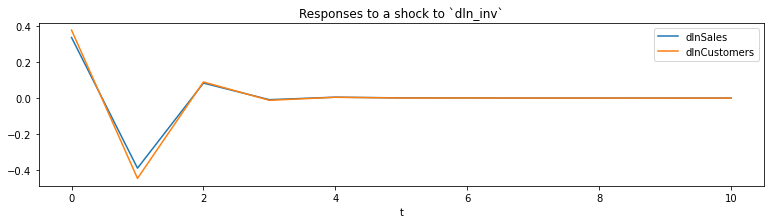

In [57]:
ax = res.impulse_responses(10, orthogonalized=True).plot(figsize=(13,3))
ax.set(xlabel='t', title='Responses to a shock to `dln_inv`');

## Analyze data_store3 and build a model

In [ ]:
# import seaborn as sns
# fig = plt.subplots(figsize=(12, 2))
# ax = sns.boxplot(x=data_store1['Sales'],whis=1.5)

In [ ]:
# fig = data_store1.Sales.hist(figsize = (12,4))

In [ ]:
# data_store1["Sales"] = np.where(data_store1["Sales"] <=2000.0, 2000.0,data_store1['Sales'])
# data_store1["Sales"] = np.where(data_store1["Sales"] >8000.0, 8000.0,data_store1['Sales'])

In [ ]:
# fig = data_store1.Sales.hist(figsize = (12,4))

In [ ]:
# fig = data_store1.Customers.hist(figsize = (12,4))